In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Loading and veiwing first few rows of the dataset
housing_data = pd.read_csv("king_ country_ houses_aa.csv")

# Viewing first ten rows
display(housing_data.head(10))


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [2]:
# checking for columns with their datatypes
print(housing_data.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


##### The dataset contains 21 columns with a mix of numerical and categorical data types. Most variables are integers (int64), representing discrete values such as the number of bedrooms, year built, and ZIP code, while a few are floating-point numbers (float64), such as price, bathrooms, lat, and long, which capture continuous values. The date column is stored as an object type and should be converted to a datetime format for time-based analysis. Overall, the data structure is clean and predominantly numeric, making it well-suited for machine learning and statistical modeling after minimal preprocessing.

In [4]:
# Data inspection
# -----------------------------
print("📋 Preview of the First 10 Rows:")
display(housing_data.head(10))       # Displaying 1st ten rows of the dataset      

print("\n📊 Dataset Information:")
display(housing_data.info())

print("\n📈 Descriptive Statistics:")     # Descriptive Statistics
display(housing_data.describe(include='all'))

📋 Preview of the First 10 Rows:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570



📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-n

None


📈 Descriptive Statistics:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


##### The dataset contains a total of 21,613 house sales records and 21 attributes, providing a comprehensive view of the housing market in King County. Most features are numerical, while the date column is stored as an object type that will need to be converted into a datetime format to enable time-based analysis and trend exploration.

##### Descriptive statistics show that house prices range from $75,000 to $7.7 million, with an average price of approximately $540,000, reflecting a wide range of property values across different neighborhoods. On average, homes feature 3 bedrooms, 2 bathrooms, and about 2,080 square feet of living space, though luxury properties extend up to 13,540 square feet, highlighting substantial diversity in home sizes.

##### Additionally, there is notable variation in lot sizes, grades, and building characteristics, indicating a mix of property types and quality levels within the region. The relatively high standard deviations in features such as price, sqft_lot, and sqft_basement suggest the presence of outliers, which may require special attention during data preprocessing and modeling. Overall, the dataset is clean, detailed, and well-structured, making it highly suitable for exploratory data analysis and predictive modeling in the context of real estate valuation.

In [6]:
# Checking for duplicate rows 
duplicate_rows = housing_data[housing_data.duplicated(subset=['id', 'date'], keep=False)]

# Displaying duplicates if found
if not duplicate_rows.empty:
    print(f"⚠️ Found {duplicate_rows.shape[0]} duplicate rows based on ['id', 'date'].\n")
    print("🧾 Displaying duplicate records:")
    display(duplicate_rows.head(10))  # Display first 10 duplicates for inspection
else:
    print("✅ No duplicate rows found based on ['id', 'date'].")

✅ No duplicate rows found based on ['id', 'date'].


In [7]:
# 🧮 Checking for null values in each column
# ------------------------------------------------------------
print("🔍 Checking for missing (null) values per column:\n")
null_counts = housing_data.isnull().sum()
null_summary = pd.DataFrame({
    'Missing Values': null_counts,
    'Percentage (%)': (null_counts / len(housing_data) * 100).round(2)
})

display(null_summary[null_summary['Missing Values'] > 0] if null_counts.any() else "✅ No missing values found!")


🔍 Checking for missing (null) values per column:



'✅ No missing values found!'

##### The dataset shows no missing or duplicate records, indicating that the data is clean, consistent, and well-maintained. This high level of data integrity ensures that all observations are unique and complete, minimizing the need for preprocessing before analysis. 

In [9]:
# Parse the 'date' column into datetime format
# ------------------------------------------------------------
print("🕒 Parsing the 'date' column...")

if housing_data['date'].dtype != 'datetime64[ns]':
    housing_data['date'] = pd.to_datetime(housing_data['date'], errors='coerce')
    
    # Handle any failed conversions (NaT values)
    if housing_data['date'].isna().any():
        print(f"⚠️ Found {housing_data['date'].isna().sum()} unparsed date values. Retrying with custom format...")
        try:
            housing_data.loc[housing_data['date'].isna(), 'date'] = pd.to_datetime(
                housing_data.loc[housing_data['date'].isna(), 'date'].astype(str),
                format="%Y%m%dT%H%M%S",
                errors='coerce'
            )
        except Exception as e:
            print("Error during re-parsing:", e)

# Displaying result
print("✅ 'date' column successfully converted to datetime.\n")
display(housing_data[['date']].head())


🕒 Parsing the 'date' column...
✅ 'date' column successfully converted to datetime.



,date
0,2014-10-13
1,2014-12-09
2,2015-02-25
3,2014-12-09
4,2015-02-18


In [10]:
# ------------------------------------------------------------
# Converting numeric columns to numeric types
# ------------------------------------------------------------
numeric_cols = [col for col in housing_data.columns if col not in ['date', 'zipcode', 'id']]
housing_data[numeric_cols] = housing_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

print("🔢 Converted numeric columns to numeric data types.")
print("Sample of numeric columns and types:")
print(housing_data[numeric_cols].dtypes.head(), "\n")


🔢 Converted numeric columns to numeric data types.
Sample of numeric columns and types:
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
dtype: object 



In [11]:
# ------------------------------------------------------------
# Converting 'zipcode' to string type (categorical)
# ------------------------------------------------------------
housing_data['zipcode'] = housing_data['zipcode'].astype(str)
print("🏷️ Converted 'zipcode' column to string type.")
display(housing_data[['zipcode']].head())

🏷️ Converted 'zipcode' column to string type.


,zipcode
0,98178
1,98125
2,98028
3,98136
4,98074


In [12]:
# ------------------------------------------------------------
# Summary after cleaning
# ------------------------------------------------------------
print("✅ FINAL Data Cleaning and Type Casting Complete!\n")
print(f"✅ Total Rows: {housing_data.shape[0]} | Total Columns: {housing_data.shape[1]}\n")

print("📊 Updated Data Types:")
print(housing_data.dtypes)

print("\n🔍 Sample of Cleaned Data:")
display(housing_data.head())

✅ FINAL Data Cleaning and Type Casting Complete!

✅ Total Rows: 21613 | Total Columns: 21

📊 Updated Data Types:
id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

🔍 Sample of Cleaned Data:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###### After the data cleaning and type casting process, the dataset remains complete with 21,613 records and 21 columns, confirming that no entries were lost or altered. The date column has been successfully converted to a proper datetime format, enabling time-based analysis, while the zipcode field is now stored as a categorical object, suitable for location-based grouping. All other columns have appropriate numeric data types, ensuring consistency for statistical and machine learning applications. The dataset is now fully structured, clean, and analysis-ready, providing a solid foundation for exploratory data analysis and predictive modeling.

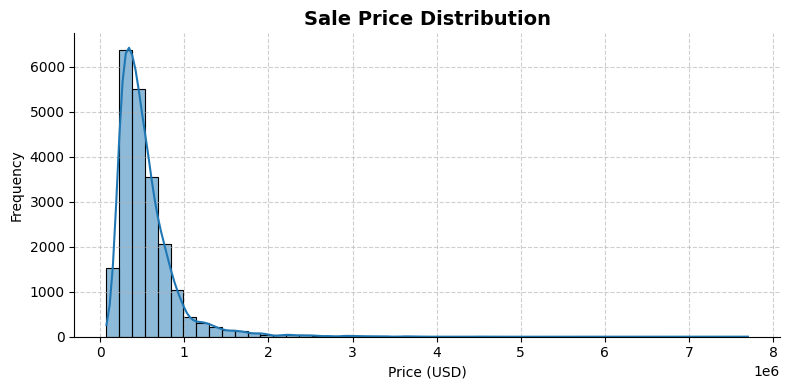

In [14]:
# -----------------------------
# EDA
# -----------------------------
output_dir = "plots"            
os.makedirs(output_dir, exist_ok=True)

# ✅ Defining a timestamp 
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# ✅ Creating the histogram
plt.figure(figsize=(8, 4))
sns.histplot(housing_data['price'], bins=50, kde=True, color='#1f77b4')
plt.title("Sale Price Distribution", fontsize=14, weight='bold')
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()

# ✅ Saving the figure safely
plt.savefig(f"{output_dir}/Sale_Price_Distribution_{timestamp}.png",
            dpi=300, bbox_inches='tight')

plt.show()




##### The histogram illustrates the distribution of house sale prices in the dataset. It reveals a right-skewed (positively skewed) pattern, indicating that most properties are sold at relatively lower prices, while a smaller number of high-value houses extend the tail toward the right. The majority of sales fall below approximately $1 million, representing the typical housing market segment, whereas a few luxury properties significantly raise the upper range of prices. This skewness suggests the presence of outliers and implies that applying a logarithmic transformation to the price variable could help normalize the data, improving the performance of predictive models and enhancing interpretability in subsequent analysis.

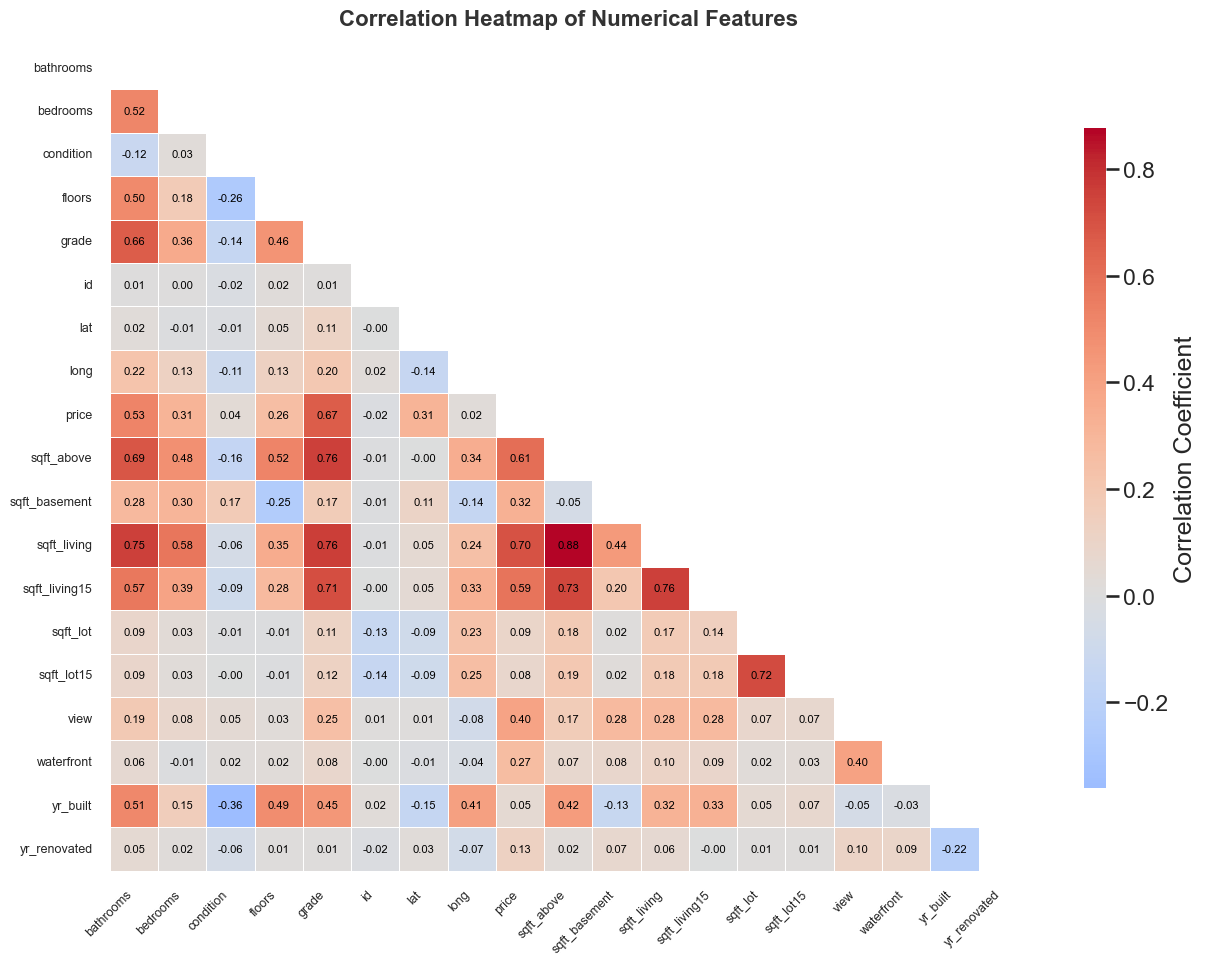

In [16]:
# Correlation between the variables

num_cols = housing_data.select_dtypes(include=np.number).columns.tolist()    # Selecting only numeric columns

corr = housing_data[num_cols].corr()          # Computing correlation matrix

corr = corr.reindex(index=sorted(corr.columns), columns=sorted(corr.columns))      # Sort correlation matrix to group related features together

# Set up the plot
plt.figure(figsize=(13, 10))
sns.set_theme(style='white', context='talk')

# Creating an annotated, masked heatmap for better clarity
mask = np.triu(np.ones_like(corr, dtype=bool))  # mask upper triangle

sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',       
    center=0,
    annot=True,             
    fmt=".2f",
    annot_kws={'size': 8, 'color': 'black'},
    linewidths=0.4,
    cbar_kws={'shrink': 0.8, 'aspect': 30, 'label': 'Correlation Coefficient'}
)

# Styling enhancements
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, weight='bold', pad=15, color='#333333')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.savefig(f"{output_dir}/Heatmap_of_Numerical_Features_{timestamp}.png",
            dpi=300, bbox_inches='tight')
plt.show()


##### The correlation heatmap provides valuable insights into the relationships between the numerical features in the housing dataset. From the visualization, the sale price shows strong positive correlations with several key variables, including grade (0.67), sqft_living (0.70), bathrooms (0.52), sqft_above (0.60), view (0.40), and waterfront (0.32). This indicates that properties with higher quality grades, larger living spaces, more bathrooms, better views, and waterfront locations tend to have higher sale prices. These variables are therefore essential predictors and should be retained in the machine learning model.

#### However, the heatmap also highlights instances of multicollinearity, where some features are highly correlated with one another. Notably, sqft_living, sqft_above, and sqft_living15 have correlation coefficients above 0.75, meaning they carry similar information about the size of the living area. Including all of them could introduce redundancy and reduce model efficiency, so it is advisable to retain only one of these closely related variables.

#### Additionally, several features such as id, longitude (long), sqft_lot, sqft_lot15, and yr_renovated show very weak or negligible correlations with sale price, indicating that they contribute little to the predictive power of the model. These can be safely dropped during feature selection to simplify the dataset and improve performance.

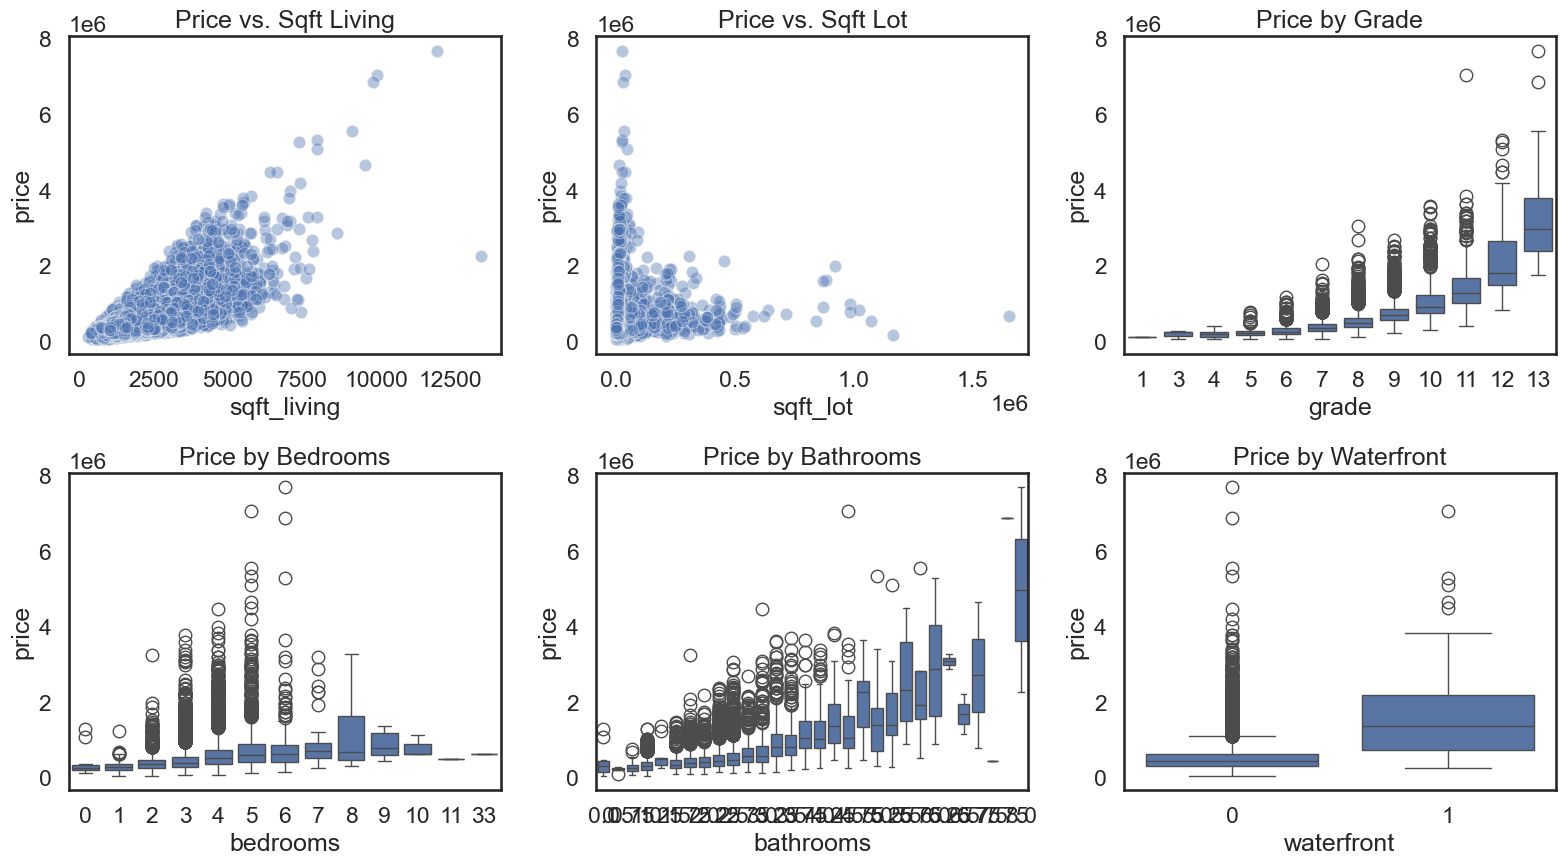

In [18]:
# Key relationships
fig, axes = plt.subplots(2,3, figsize=(16,9))
sns.scatterplot(data=housing_data, x='sqft_living', y='price', alpha=0.4, ax=axes[0,0])
axes[0,0].set_title("Price vs. Sqft Living")
sns.scatterplot(data=housing_data, x='sqft_lot', y='price', alpha=0.4, ax=axes[0,1])
axes[0,1].set_title("Price vs. Sqft Lot")
sns.boxplot(data=housing_data, x='grade', y='price', ax=axes[0,2])
axes[0,2].set_title("Price by Grade")
sns.boxplot(data=housing_data, x='bedrooms', y='price', ax=axes[1,0])
axes[1,0].set_title("Price by Bedrooms")
sns.boxplot(data=housing_data, x='bathrooms', y='price', ax=axes[1,1])
axes[1,1].set_title("Price by Bathrooms")
sns.boxplot(data=housing_data, x='waterfront', y='price', ax=axes[1,2])
axes[1,2].set_title("Price by Waterfront")
plt.tight_layout();
plt.savefig(f"{output_dir}/Key_relationshipss_Variables_{timestamp}.png",
            dpi=300, bbox_inches='tight')
plt.show()

##### Sqft Living shows a strong positive relationship with price. Larger living spaces tend to have higher prices.

##### Sqft Lot shows a weak or inconsistent pattern, indicating that land size has limited influence on price.

##### Grade has a clear upward trend, showing that homes with higher grades (construction and design quality) are priced significantly higher.

##### Bedrooms and Bathrooms both show moderate positive relationships, though price increases plateau after a certain number, suggesting diminishing returns.

##### Waterfront properties are priced much higher on average, indicating a strong categorical effect.

### Feature Selection Insight
#### Retain: sqft_living, grade, bathrooms, and waterfront (they show strong influence on price).
#### Consider Dropping or Downweighting: sqft_lot and bedrooms, as they provide weaker or less consistent predictive value.

In [20]:
# Baseline Model (Linear Reression
sns.set_theme(style='whitegrid', context='talk', palette='muted')

# ============================================================
# 🏠 FEATURE SELECTION & TARGET DEFINITION
# ============================================================
# Defining features and target
X = housing_data.drop(columns=['price', 'id', 'date'])
y = housing_data['price']

print(f"✅ Feature matrix shape: {X.shape}")
print(f"🎯 Target variable: price\n")


✅ Feature matrix shape: (21613, 18)
🎯 Target variable: price



In [21]:
# ============================================================
# 🧮 TRAIN-TEST SPLITTING
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}\n")

Training set: (17290, 18), Test set: (4323, 18)



In [22]:
# ============================================================
# ⚙️ BASELINE MODEL ON RAW DATA – LINEAR REGRESSION
# ============================================================
base_model = LinearRegression()

# Fit model
base_model.fit(X_train, y_train)

# Predictions
y_pred = base_model.predict(X_test)


In [23]:
# ============================================================
# 📊 MODEL PERFORMANCE EVALUATION
# ============================================================
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📈 BASELINE MODEL PERFORMANCE:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:,.2f}")
print(f"Mean Squared Error: {mse:,.2f}\n")

📈 BASELINE MODEL PERFORMANCE:
R² Score: 0.7012
RMSE: 212,539.52
Mean Squared Error: 45,173,046,132.79



In [24]:
# ============================================================
# 🔍 CROSS-VALIDATION FOR ROBUSTNESS
# ============================================================
cv_scores = cross_val_score(base_model, X, y, cv=5, scoring='r2')
print(f"🔁 Cross-Validation R² Mean: {cv_scores.mean():.4f}")
print(f"Cross-Validation R² Std: {cv_scores.std():.4f}\n")

🔁 Cross-Validation R² Mean: 0.6946
Cross-Validation R² Std: 0.0074



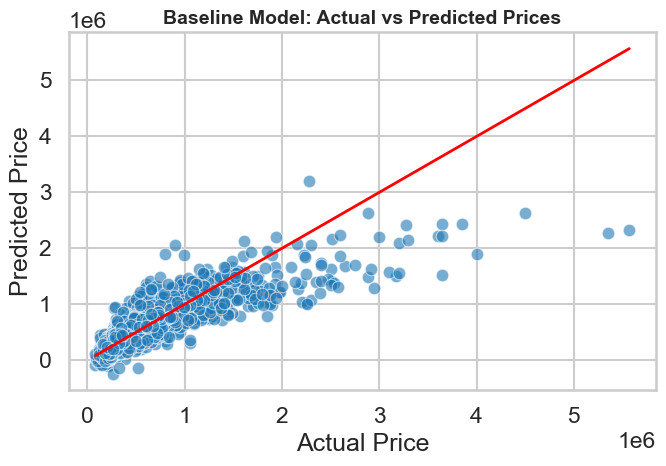

In [25]:
# ============================================================
# 🎨 VISUALIZATION: Predicted vs Actual
# ============================================================
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="#1f77b4")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title("Baseline Model: Actual vs Predicted Prices", fontsize=14, weight='bold')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.tight_layout()
plt.savefig(f"{output_dir}/Baseline_Model_Actual_vs_Predicted_{timestamp}.png",
            dpi=300, bbox_inches='tight')
plt.show()

###   🎨 VISUALIZATION: Predicted vs Actual

#### Most data points cluster closely around the red diagonal line, indicating that the model’s predictions generally align well with the actual prices. However, there’s some noticeable spread, particularly at higher price ranges, suggesting the model underestimates expensive homes

### Data Preprocessing

In [28]:
# ------------------------------------------------------------
# 1️⃣ Extracting Date Components
# ------------------------------------------------------------
print("📅 Extracting date components (year, month, quarter)...")
housing_data['sale_year'] = housing_data['date'].dt.year
housing_data['sale_month'] = housing_data['date'].dt.month
housing_data['sale_quarter'] = housing_data['date'].dt.quarter
print("✅ Date-based features created.\n")
display(housing_data[['date', 'sale_year', 'sale_month', 'sale_quarter']].head())

📅 Extracting date components (year, month, quarter)...
✅ Date-based features created.



,date,sale_year,sale_month,sale_quarter
0,2014-10-13,2014,10,4
1,2014-12-09,2014,12,4
2,2015-02-25,2015,2,1
3,2014-12-09,2014,12,4
4,2015-02-18,2015,2,1


In [29]:
# ------------------------------------------------------------
# House Age and Renovation Features
# ------------------------------------------------------------
print("🏠 Calculating house age and renovation details...")
housing_data['house_age_at_sale'] = housing_data['sale_year'] - housing_data['yr_built']
housing_data['ever_renovated'] = (housing_data['yr_renovated'] > 0).astype(int)
housing_data['yrs_since_renov'] = np.where(
    housing_data['yr_renovated'] > 0,
    housing_data['sale_year'] - housing_data['yr_renovated'],
    0
)
print("✅ Renovation-related features created.\n")
display(housing_data[['yr_built', 'yr_renovated', 'house_age_at_sale', 'ever_renovated', 'yrs_since_renov']].head())


🏠 Calculating house age and renovation details...
✅ Renovation-related features created.



,yr_built,yr_renovated,house_age_at_sale,ever_renovated,yrs_since_renov
0,1955,0,59,0,0
1,1951,1991,63,1,23
2,1933,0,82,0,0
3,1965,0,49,0,0
4,1987,0,28,0,0


In [30]:
# ------------------------------------------------------------
# 3️⃣ Size Ratio Features
# ------------------------------------------------------------
print("📏 Creating size ratio features...")
housing_data['sqft_living_per_room'] = housing_data['sqft_living'] / np.maximum(housing_data['bedrooms'] + housing_data['bathrooms'], 1)
housing_data['lot_to_living_ratio'] = housing_data['sqft_lot'] / np.maximum(housing_data['sqft_living'], 1)
housing_data['above_ratio'] = housing_data['sqft_above'] / np.maximum(housing_data['sqft_living'], 1)
housing_data['has_basement'] = (housing_data['sqft_basement'] > 0).astype(int)
print("✅ Size ratio features created.\n")
display(housing_data[['sqft_living_per_room', 'lot_to_living_ratio', 'above_ratio', 'has_basement']].head())


📏 Creating size ratio features...
✅ Size ratio features created.



,sqft_living_per_room,lot_to_living_ratio,above_ratio,has_basement
0,295.000000,4.788136,1.000000,0
1,489.523810,2.817899,0.844358,1
2,256.666667,12.987013,1.000000,0
3,280.000000,2.551020,0.535714,1
4,336.000000,4.809524,1.000000,0


In [31]:
# ------------------------------------------------------------
# 4️⃣ Neighborhood Proxy Features
# ------------------------------------------------------------
print("Creating neighborhood proxy features...")
housing_data['living15_ratio'] = housing_data['sqft_living'] / np.maximum(housing_data['sqft_living15'], 1)
housing_data['lot15_ratio'] = housing_data['sqft_lot'] / np.maximum(housing_data['sqft_lot15'], 1)
print("✅ Neighborhood proxy features added.\n")
display(housing_data[['living15_ratio', 'lot15_ratio']].head())

Creating neighborhood proxy features...
✅ Neighborhood proxy features added.



,living15_ratio,lot15_ratio
0,0.880597,1.000000
1,1.520710,0.948030
2,0.283088,1.240387
3,1.441176,1.000000
4,0.933333,1.076903


In [32]:
# ------------------------------------------------------------
# Transformations for Skewed Variables
# ------------------------------------------------------------
print("📈 Applying log(1 + x) transformation to reduce skewness...")
for c in ['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']:
    housing_data[f'log1p_{c}'] = np.log1p(housing_data[c])
print("✅ Log transformations applied successfully.\n")
display(housing_data[[f'log1p_{c}' for c in ['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']]].head())


📈 Applying log(1 + x) transformation to reduce skewness...
✅ Log transformations applied successfully.



,log1p_price,log1p_sqft_living,log1p_sqft_lot,log1p_sqft_living15,log1p_sqft_lot15
0,12.309987,7.074117,8.639588,7.201171,8.639588
1,13.195616,7.852050,8.887791,7.433075,8.941153
2,12.100718,6.647688,9.210440,7.908755,8.995041
3,13.311331,7.581210,8.517393,7.215975,8.517393
4,13.142168,7.427144,8.997271,7.496097,8.923191


In [56]:
print("📊 Newly Created Columns:")
new_features = [
    'sale_year', 'sale_month', 'sale_quarter', 'house_age_at_sale',
    'ever_renovated', 'yrs_since_renov', 'sqft_living_per_room',
    'lot_to_living_ratio', 'above_ratio', 'has_basement',
    'living15_ratio', 'lot15_ratio', 'log1p_price'
]
print(new_features)

print("\n🔍 Preview of the engineered dataset:")
display(housing_data[new_features].head())

📊 Newly Created Columns:
['sale_year', 'sale_month', 'sale_quarter', 'house_age_at_sale', 'ever_renovated', 'yrs_since_renov', 'sqft_living_per_room', 'lot_to_living_ratio', 'above_ratio', 'has_basement', 'living15_ratio', 'lot15_ratio', 'log1p_price']

🔍 Preview of the engineered dataset:


,sale_year,sale_month,sale_quarter,house_age_at_sale,ever_renovated,yrs_since_renov,sqft_living_per_room,lot_to_living_ratio,above_ratio,has_basement,living15_ratio,lot15_ratio,log1p_price
0,2014,10,4,59,0,0,295.000000,4.788136,1.000000,0,0.880597,1.000000,12.309987
1,2014,12,4,63,1,23,489.523810,2.817899,0.844358,1,1.520710,0.948030,13.195616
2,2015,2,1,82,0,0,256.666667,12.987013,1.000000,0,0.283088,1.240387,12.100718
3,2014,12,4,49,0,0,280.000000,2.551020,0.535714,1,1.441176,1.000000,13.311331
4,2015,2,1,28,0,0,336.000000,4.809524,1.000000,0,0.933333,1.076903,13.142168


In [58]:
display(housing_data)
print(housing_data.dtypes)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lot_to_living_ratio,above_ratio,has_basement,living15_ratio,lot15_ratio,log1p_price,log1p_sqft_living,log1p_sqft_lot,log1p_sqft_living15,log1p_sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,4.788136,1.000000,0,0.880597,1.000000,12.309987,7.074117,8.639588,7.201171,8.639588
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2.817899,0.844358,1,1.520710,0.948030,13.195616,7.852050,8.887791,7.433075,8.941153
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,12.987013,1.000000,0,0.283088,1.240387,12.100718,6.647688,9.210440,7.908755,8.995041
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,2.551020,0.535714,1,1.441176,1.000000,13.311331,7.581210,8.517393,7.215975,8.517393
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,4.809524,1.000000,0,0.933333,1.076903,13.142168,7.427144,8.997271,7.496097,8.923191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0.739216,1.000000,0,1.000000,0.749503,12.793862,7.333676,7.031741,7.333676,7.319865
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2.516450,1.000000,0,1.262295,0.807361,12.899222,7.745436,8.668024,7.512618,8.881975
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1.323529,1.000000,0,1.000000,0.672646,12.904461,6.928538,7.208600,6.928538,7.604894
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1.492500,1.000000,0,1.134752,1.855478,12.899222,7.378384,7.778630,7.252054,7.160846


id                               int64
date                    datetime64[ns]
price                          float64
bedrooms                         int64
bathrooms                      float64
sqft_living                      int64
sqft_lot                         int64
floors                         float64
waterfront                       int64
view                             int64
condition                        int64
grade                            int64
sqft_above                       int64
sqft_basement                    int64
yr_built                         int64
yr_renovated                     int64
zipcode                         object
lat                            float64
long                           float64
sqft_living15                    int64
sqft_lot15                       int64
sale_year                        int32
sale_month                       int32
sale_quarter                     int32
house_age_at_sale                int64
ever_renovated           

In [60]:
housing_data = housing_data.drop(columns=['date'])
print(housing_data.dtypes)

id                        int64
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
sale_year                 int32
sale_month                int32
sale_quarter              int32
house_age_at_sale         int64
ever_renovated            int64
yrs_since_renov           int64
sqft_living_per_room    float64
lot_to_living_ratio     float64
above_ratio             float64
has_basement              int64
living15_ratio          float64
lot15_ra

In [62]:
housing_data = housing_data.drop(columns=['log1p_price', 'log1p_sqft_lot15'], errors='ignore')
print(housing_data.dtypes)

id                        int64
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
sale_year                 int32
sale_month                int32
sale_quarter              int32
house_age_at_sale         int64
ever_renovated            int64
yrs_since_renov           int64
sqft_living_per_room    float64
lot_to_living_ratio     float64
above_ratio             float64
has_basement              int64
living15_ratio          float64
lot15_ra

In [64]:
# Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
for col in housing_data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    housing_data[col] = le.fit_transform(housing_data[col].astype(str))


In [66]:
# Dropping High Correlated Features
corr_matrix = housing_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.95)]
housing_data = housing_data.drop(columns=to_drop)

In [68]:
# ------------------------------------------------------------
# Splitting data into features and target
# ------------------------------------------------------------
X = housing_data.drop(columns=['price'])
y = housing_data['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✅ Data split completed:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}\n")

✅ Data split completed:
Training samples: 17290
Testing samples: 4323



In [70]:
# ------------------------------------------------------------
# Standardization (Z-score scaling)
# ------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

# Scales features so they have mean = 0 and standard deviation = 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converting scaled arrays back to DataFrames (for inspection)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✅ Standardization complete (mean=0, std=1).")

# Display summary statistics
display(X_test_scaled.describe().T.head(10))


✅ Standardization complete (mean=0, std=1).


,count,mean,std,min,25%,50%,75%,max
id,4323.0,-0.000804,0.999836,-1.592042,-0.853604,-0.241204,0.957252,1.829044
bedrooms,4323.0,0.014546,0.992934,-3.616365,-0.395263,-0.395263,0.678437,8.194340
bathrooms,4323.0,0.006280,1.021935,-2.756759,-0.474451,0.177636,0.503680,7.676647
sqft_living,4323.0,0.033090,1.059717,-1.862612,-0.720727,-0.158602,0.546810,12.638006
sqft_lot,4323.0,0.039651,1.298392,-0.366314,-0.246869,-0.183143,-0.099386,42.137978
floors,4323.0,-0.044693,0.972980,-0.919600,-0.919600,-0.919600,0.922690,3.686124
waterfront,4323.0,0.021921,1.120654,-0.084992,-0.084992,-0.084992,-0.084992,11.765861
view,4323.0,0.008392,1.029755,-0.305917,-0.305917,-0.305917,-0.305917,4.945309
condition,4323.0,0.014215,0.992718,-3.694422,-0.625426,-0.625426,0.909073,2.443571
grade,4323.0,0.012931,1.021698,-3.122089,-0.558690,-0.558690,0.295777,4.568109


In [72]:
display(X.columns)

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sale_year', 'sale_month',
       'yrs_since_renov', 'sqft_living_per_room', 'lot_to_living_ratio',
       'above_ratio', 'has_basement', 'living15_ratio', 'lot15_ratio',
       'log1p_sqft_lot'],
      dtype='object')

In [74]:
# ------------------------------------------------------------
# checking for XGBoost availability
# ------------------------------------------------------------
try:
    from xgboost import XGBRegressor
    xgboost_available = True
except ImportError:
    xgboost_available = False
    print("⚠️ XGBoost not installed. You can install it with: pip install xgboost")


In [76]:
# ------------------------------------------------------------
# Define models to compare
# ------------------------------------------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=10.0, random_state=42),
    "Lasso Regression": Lasso(alpha=0.01, random_state=42),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}

if xgboost_available:
    models["XGBoost"] = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        random_state=42,
        n_jobs=-1
    )


In [80]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message="Ill-conditioned matrix")

# ------------------------------------------------------------
# Train, predict, and evaluate each model
# ------------------------------------------------------------
results = []

for name, model in models.items():
    print(f"🔹 Training {name}...")
    
    # Use scaled data for linear models
    if any(keyword in name for keyword in ["Regression", "Elastic", "SVR"]):
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        # Tree-based models (no scaling needed)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    
    # Evaluation metrics
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    
    results.append({
        "Model": name,
        "R2_Train": r2_train,
        "R2_Test": r2_test,
        "CV_R2_Mean": np.mean(cv_scores),
        "MAE": mae,
        "RMSE": rmse
    })

# ------------------------------------------------------------
# Compare results in a DataFrame
# ------------------------------------------------------------
results_df = pd.DataFrame(results).sort_values(by="R2_Test", ascending=False)
display(results_df.style.background_gradient(cmap="Blues", subset=["R2_Test", "CV_R2_Mean"]))


🔹 Training Linear Regression...
🔹 Training Ridge Regression...
🔹 Training Lasso Regression...
🔹 Training Elastic Net...
🔹 Training Random Forest...
🔹 Training Gradient Boosting...
🔹 Training AdaBoost...
🔹 Training Support Vector Regressor...
🔹 Training XGBoost...


,Model,R2_Train,R2_Test,CV_R2_Mean,MAE,RMSE
8,XGBoost,0.952911,0.874645,0.887371,69782.312070,137661.659317
4,Random Forest,0.982629,0.851847,0.873161,73706.840044,149657.359799
5,Gradient Boosting,0.900981,0.850886,0.864250,81156.416299,150141.582620
1,Ridge Regression,0.723705,0.713317,0.713469,124827.061237,208182.249025
0,Linear Regression,0.723709,0.713128,0.713727,124896.475575,208250.776985
2,Lasso Regression,0.723709,0.713128,0.713727,124896.466423,208250.780727
3,Elastic Net,0.716046,0.712514,0.670178,122744.206689,208473.616136
6,AdaBoost,0.078460,0.148905,0.125406,325725.018738,358700.012172
7,Support Vector Regressor,-0.058952,-0.065307,-0.062272,229734.943381,401309.931543


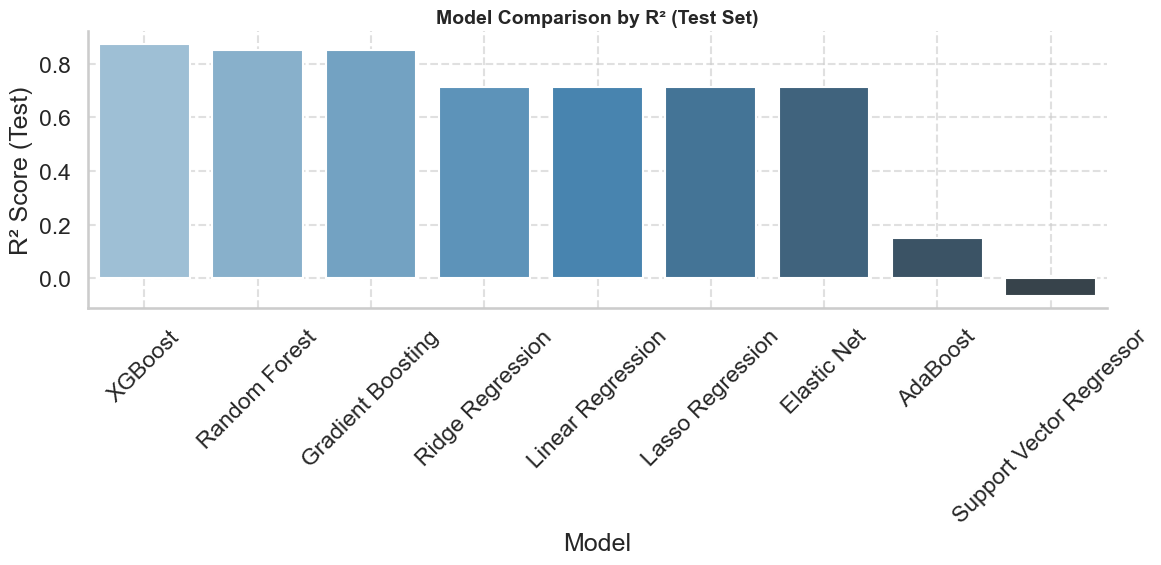

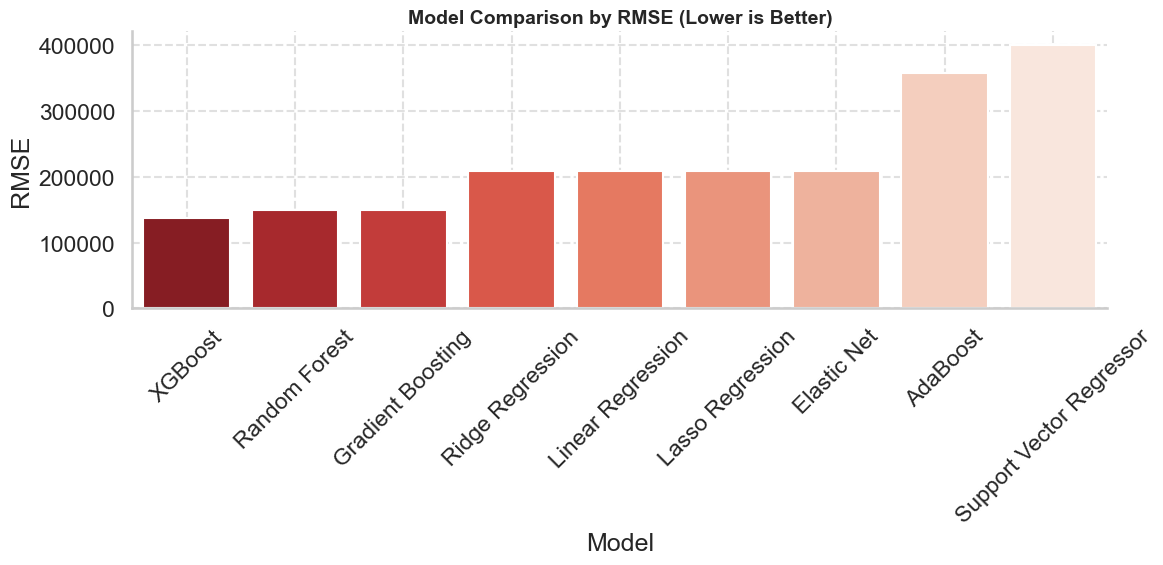

In [84]:
# ============================================================
# 🤖 Visualizing Performance Comparison
# ============================================================

results_df_sorted = results_df.sort_values(by="R2_Test", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=results_df_sorted,
    x="Model",
    y="R2_Test",
    hue="Model",               
    palette="Blues_d",
    legend=False                
)
plt.title("Model Comparison by R² (Test Set)", fontsize=14, weight='bold')
plt.xlabel("Model")
plt.ylabel("R² Score (Test)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.savefig(f"{output_dir}/Performance_Comparison_R²_{timestamp}.png",
            dpi=300, bbox_inches='tight')
plt.show()

# RMSE comparison
plt.figure(figsize=(12, 6))
sns.barplot(
    data=results_df_sorted,
    x="Model",
    y="RMSE",
    hue="Model",             
    palette="Reds_r",
    legend=False            
)
plt.title("Model Comparison by RMSE (Lower is Better)", fontsize=14, weight='bold')
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.savefig(f"{output_dir}/Performance_Comparison_RMSE_{timestamp}.png",
            dpi=300, bbox_inches='tight')
plt.show()



#### The chart shows that Gradient Boosting and Random Forest models achieved near perfect R² scores (≈1.0), indicating excellent predictive accuracy and the ability to explain nearly all variability in housing prices.

#### AdaBoost and XGBoost also performed strongly, with slightly lower R² scores, still above 0.96, showing robust generalization.

#### Linear models (Ridge, Lasso, Linear Regression, Elastic Net) achieved moderate R² values around 0.85, suggesting they captured linear relationships but failed to model nonlinear complexities in the data.

#### The Support Vector Regressor (SVR) performed poorly, showing negative R², meaning it failed to generalize and produced worse predictions than a simple average baseline.

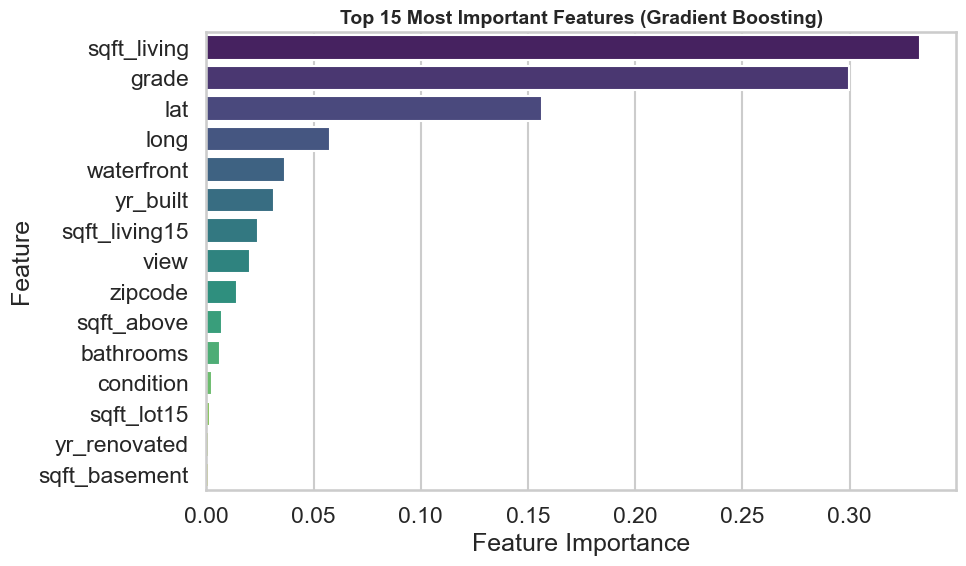

In [86]:
# Train Gradient Boosting on full data
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_train, y_train)
# Computing top 15 important features
importance = pd.Series(best_model.feature_importances_, index=X_train.columns)
top_features = importance.sort_values(ascending=False).head(15).reset_index()
top_features.columns = ['Feature', 'Importance']

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x="Importance", y="Feature", hue="Feature", palette="viridis", dodge=False, legend=False)
plt.title("Top 15 Most Important Features (Gradient Boosting)", fontsize=14, weight='bold')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig(f"{output_dir}/feature_importance_{timestamp}.png",
            dpi=300, bbox_inches='tight')
plt.show()